In [1]:
from pylab import *
import seaborn as sns

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

In [3]:
N = int(1e6)
z = rand(N)**(-3.0 + 1)
z = sort(z)

In [4]:
cdf = arange(1, N+1) / float(N)

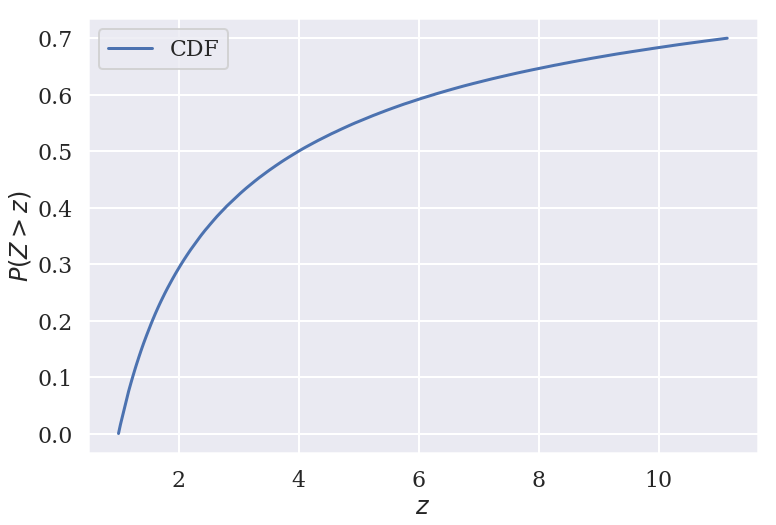

In [5]:
cutoff = int(7e5)
plot(z[:cutoff], cdf[:cutoff], label="CDF")

legend()
xlabel(r"$z$")
ylabel(r"$P(Z > z)$")
savefig("problem-d-2.eps")

show()

In [6]:
from scipy.stats import linregress 

fz = diff(cdf) / diff(z)
alpha, log_k, rvalue, pvalue, stderr = linregress(log(z[1:]), log(fz),)

k = exp(log_k)
pdf = k*z**alpha

print("k = {}, alpha = {}, R2 = {}, pvalue = {}, stderr = {}".format(k, alpha, rvalue**2, pvalue, stderr))

k = 0.888822878697, alpha = -1.49929318492, R2 = 0.845711428306, pvalue = 0.0, stderr = 0.000640387723884


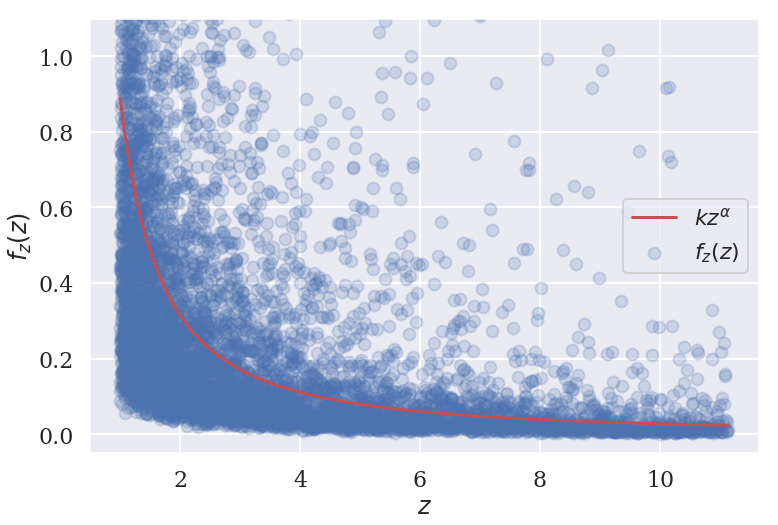

In [7]:
scatter(z[:cutoff:100], fz[:cutoff:100], alpha=0.2, label="$f_z(z)$")
plot(z[:cutoff], pdf[:cutoff], 'r-', label=r"$k z^{\alpha}$")

ylim(-0.05, 1.1)

legend()
xlabel(r"$z$")
ylabel(r"$f_z(z)$")
savefig("problem-d-1.eps")
show()

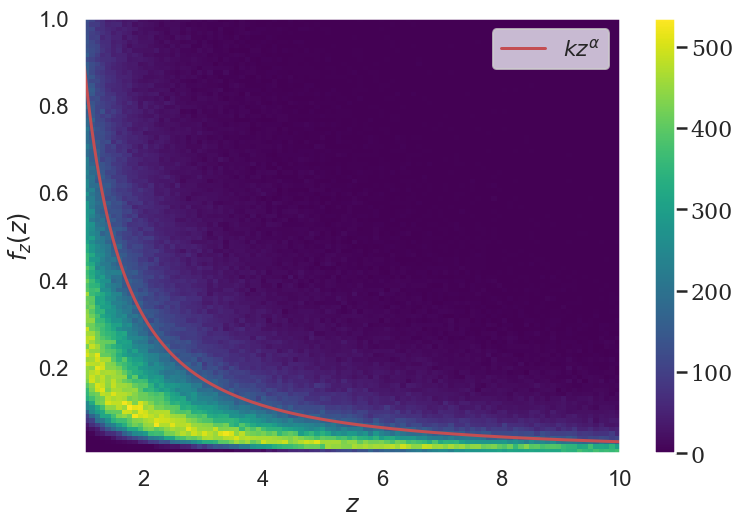

In [8]:
tmp_z = z[1:]

tmp_fz = fz[fz < 1.0]
tmp_z = tmp_z[fz < 1.0]

tmp_fz = tmp_fz[tmp_z < 10.0]
tmp_z = tmp_z[tmp_z < 10.0]

with sns.axes_style("dark"):
    plot(z[:cutoff], pdf[:cutoff], 'r-', label=r"$k z^{\alpha}$")
    hist2d(tmp_z, tmp_fz, (100, 100), cmap=cm.viridis)
    
legend()
xlabel(r"$z$")
ylabel(r"$f_z(z)$")
colorbar()
savefig("problem-d-3.eps")
show()

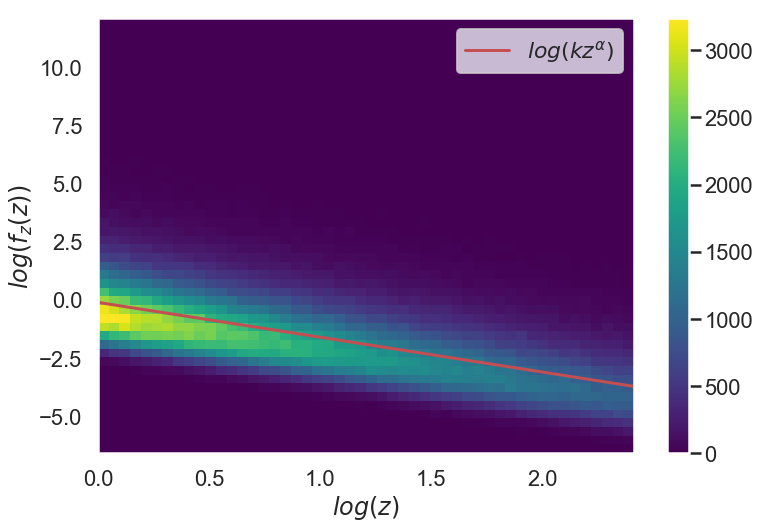

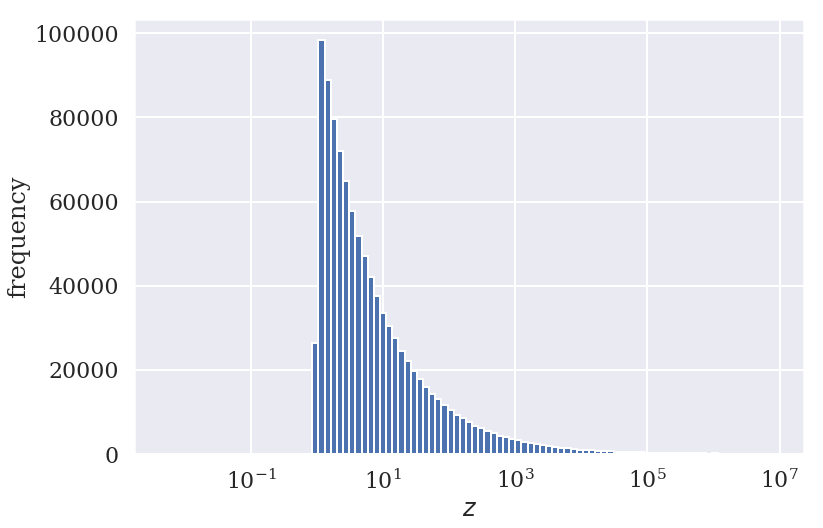

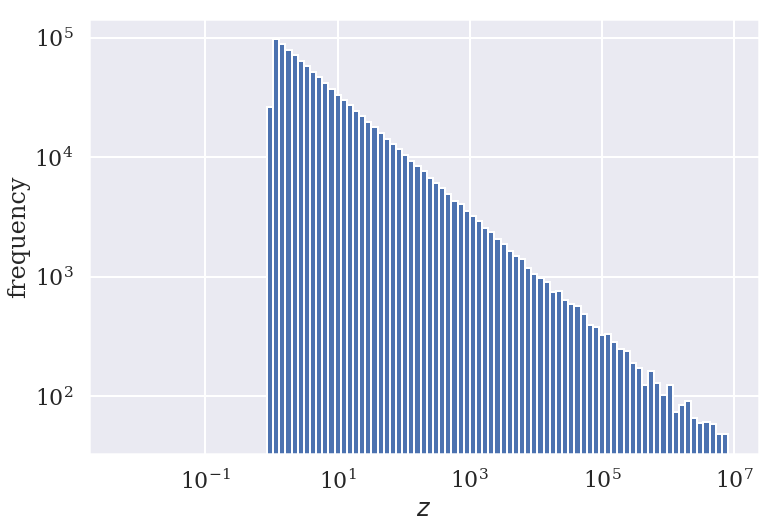

In [9]:
log_z = log(z[1:cutoff+1])
log_fz = log(fz[:cutoff])

with sns.axes_style("dark"):
    plot(log_z, log(pdf[:cutoff]), 'r-', label=r"$log(k z^{\alpha})$")
    hist2d(log_z, log_fz, (50, 50), cmap=cm.viridis)
    
    legend()
    xlabel(r"$log(z)$")
    ylabel(r"$log(f_z(z))$")
    colorbar()
    savefig("problem-e3.eps")
    show()
    
hist(z, bins=logspace(log(0.1), log(1000), 100))
gca().set_xscale("log")
xlabel(r"$z$")
ylabel(r"frequency")
savefig("problem-e1.eps")
show()    
    
hist(z, bins=logspace(log(0.1), log(1000), 100))
gca().set_xscale("log")
gca().set_yscale("log")
xlabel(r"$z$")
ylabel(r"frequency")
savefig("problem-e2.eps")
show()